![bse_logo_textminingcourse](https://bse.eu/sites/default/files/bse_logo_small.png)

# *Homework 3*

### Authors: **Tirdod Behbehani and Victor Sobottka** 

#### Class: **Big Data Management**

We will work with the following 3 datasets:

- Unemployment (JSON);
- Income (CSV);
- Incidences (CSV);

## Libraries

In [84]:
import pandas as pd 
import numpy as np
import os
from pathlib import Path
import json

## **A.1  Explore the data and choose the KPI’s**

Study and explore the provided datasets. Choose three datasets to be uses as data for the Landing Zone. Decide which analysis you will perform (i.e.,
fix the KPIs).

In [85]:
# Path to 'datasets' folder
datasets_path = Path.cwd() / "datasets"

# Get all subfolders inside 'datasets'
folders = sorted([f for f in datasets_path.iterdir() if f.is_dir()])

# Initialize a list to store the final dataframes
dfs = []

# Loop through the first 3 folders (or all if you want)
for folder in folders[:3]:
    print(f"\n Processing folder: {folder.name}")
    dataframes = []

    for file in folder.iterdir():
        if not file.is_file():
            continue

        try:
            if file.suffix == ".csv":
                df = pd.read_csv(file)
                print(f"  ✔ Read CSV: {file.name} | Shape: {df.shape}")
                dataframes.append(df)

            elif file.suffix == ".json":
                with open(file, 'r', encoding='utf-8') as f:
                    raw_json = json.load(f)

                if raw_json.get("success") is False:
                    print(f"  ⚠ Skipped invalid JSON (API error): {file.name}")
                    continue

                # Try to extract records from structured JSON (if available)
                if "result" in raw_json and "records" in raw_json["result"]:
                    df = pd.json_normalize(raw_json["result"]["records"])
                else:
                    # Assume it’s flat or list of dicts
                    df = pd.json_normalize(raw_json)

                print(f"  ✔ Read JSON: {file.name} | Shape: {df.shape}")
                dataframes.append(df)

        except Exception as e:
            print(f" Failed to load {file.name}: {e}")

    # Concatenate all files in this folder
    if dataframes:
        combined_df = pd.concat(dataframes, ignore_index=True)
        dfs.append(combined_df)
        print(f" Combined DataFrame for {folder.name}: {combined_df.shape}")
    else:
        dfs.append(None)
        print(f" No valid data files found in {folder.name}")

# Unpack into df1, df2, df3
df1, df2, df3 = dfs[:3]

# Show sample outputs
if df1 is not None:
    print("\n DF1 Sample:\n", df1.head())
if df2 is not None:
    print("\n DF2 Sample:\n", df2.head())
if df3 is not None:
    print("\n DF3 Sample:\n", df3.head())



 Processing folder: incidences
  ✔ Read CSV: 2018_Peticions_ciutadanes.csv | Shape: (100, 26)
  ✔ Read CSV: 2014_Peticions_ciutadanes.csv | Shape: (100, 26)
  ✔ Read CSV: 2015_Peticions_ciutadanes.csv | Shape: (100, 26)
  ✔ Read CSV: 2021_IRIS_Peticions_Ciutadanes_OpenData.csv | Shape: (100, 26)
  ✔ Read CSV: 2020_IRIS_Peticions_Ciutadanes_OpenData.csv | Shape: (100, 26)
  ✔ Read CSV: 2017_Peticions_ciutadanes.csv | Shape: (100, 26)
  ✔ Read CSV: 2022_IRIS_Peticions_Ciutadanes_OpenData.csv | Shape: (100, 26)
  ✔ Read CSV: 2019_Peticions_ciutadanes.csv | Shape: (100, 26)
  ✔ Read CSV: 2016_Peticions_ciutadanes.csv | Shape: (100, 26)
 Combined DataFrame for incidences: (900, 26)

 Processing folder: income
  ✔ Read CSV: 2015_Distribucio_territorial_renda_familiar.csv | Shape: (74, 7)
  ✔ Read CSV: 2008_Distribucio_territorial_renda_familiar.csv | Shape: (73, 7)
  ✔ Read CSV: 2013_Distribucio_territorial_renda_familiar.csv | Shape: (74, 7)
  ✔ Read CSV: 2010_Distribucio_territorial_renda

In [86]:
incident_df = df1.copy()
incident_df.head()

,CODI_DISTRICTE,DISTRICTE,ANY_DATA_TANCAMENT,DETALL,BARRI,FITXA_ID,LATITUD,AREA,COORDENADA_Y,COORDENADA_X,...,MES_DATA_TANCAMENT,TIPUS_VIA,ANY_DATA_ALTA,MES_DATA_ALTA,SUPORT,CARRER,CODI_BARRI,_id,TIPUS,DIA_DATA_TANCAMENT
0,5.0,Sarrià-Sant Gervasi,2018,Vehicles motor abandonats,Sant Gervasi - la Bonanova,573739,41.41143,Mobilitat,85004982.0,26931896.0,...,1,Carrer,2017,12,WEB,Bellesguard,25.0,1,INCIDENCIA,1
1,5.0,Sarrià-Sant Gervasi,2018,Vehicles motor abandonats,les Tres Torres,573738,41.39589,Mobilitat,83273451.0,27536884.0,...,1,Carrer,2017,12,TELÈFON,Doctor Roux,24.0,2,INCIDENCIA,1
2,2.0,Eixample,2018,Objectes a netejar / retirar,la Nova Esquerra de l'Eixample,573728,41.38189,Recollida i neteja de l'espai urbà,81702349.0,29214771.0,...,1,Carrer,2017,12,TELÈFON,Calàbria,9.0,3,INCIDENCIA,1
3,8.0,Nou Barris,2018,Recollida animals morts espai públic,la Guineueta,573730,41.43997,Recollida i neteja de l'espai urbà,88140422.0,30351204.0,...,1,Via,2017,12,TELÈFON,Favència,48.0,4,INCIDENCIA,1
4,6.0,Gràcia,2018,Objectes a netejar / retirar,la Vila de Gràcia,573729,41.39755,Recollida i neteja de l'espai urbà,83438243.0,29547477.0,...,1,Carrer,2017,12,TELÈFON,Doctor Rizal,31.0,5,INCIDENCIA,1


In [87]:
income_df = df2.copy()
income_df.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Població,Índex RFD Barcelona = 100
0,2015,1,Ciutat Vella,1,el Raval,47617,75.8
1,2015,1,Ciutat Vella,2,el Barri Gòtic,15269,108.5
2,2015,1,Ciutat Vella,3,la Barceloneta,15036,76.6
3,2015,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",22305,96.4
4,2015,2,Eixample,5,el Fort Pienc,31645,104.8


In [88]:
unemployment_df = df3.copy()
unemployment_df.head()

,Codi_Districte,Sexe,Nom_Districte,Demanda_ocupació,Nom_Barri,Mes,Codi_Barri,Nombre,_id,Any,Demanda_ocupacio
0,1,Homes,Ciutat Vella,Atur registrat,el Raval,1,1,2107,1,2017,NaN
1,1,Homes,Ciutat Vella,Atur registrat,el Barri Gòtic,1,2,538,2,2017,NaN
2,1,Homes,Ciutat Vella,Atur registrat,la Barceloneta,1,3,537,3,2017,NaN
3,1,Homes,Ciutat Vella,Atur registrat,"Sant Pere, Santa Caterina i la Ribera",1,4,741,4,2017,NaN
4,2,Homes,Eixample,Atur registrat,el Fort Pienc,1,5,630,5,2017,NaN


In [93]:
import seaborn as sns
import matplotlib.pyplot as plt


def quick_eda(df, name="DataFrame"):
    print(f"\n EDA Report for: {name}")
    print("-" * 60)

    # Shape
    print(f" Shape: {df.shape[0]} rows × {df.shape[1]} columns")

    # Column types
    print("\n Column Types:")
    print(df.dtypes)

    # Missing values
    print("\n Missing Values (%):")
    missing = df.isnull().mean() * 100
    missing = missing[missing > 0]
    if not missing.empty:
        print(missing.sort_values(ascending=False))
    else:
        print("No missing values")

    # Unique values
    print("\n Unique Values (Top 10):")
    for col in df.columns[:10]:
        print(f"{col}: {df[col].nunique()} unique values")

    # Summary statistics
    print("\n Summary Statistics:")
    print(df.describe(include='number').T)

    # Sample rows
    print("\n Sample Rows:")
    print(df.sample(min(5, len(df))))

    print("-" * 60)

    # ---------------------------
    #  Visualizations Section
    # ---------------------------
    numeric_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns

    # Missing values heatmap
    if missing.shape[0] > 0:
        plt.figure(figsize=(10, 5))
        sns.heatmap(df.isnull(), cbar=False, cmap="YlOrRd")
        plt.title(" Missing Values Heatmap")
        plt.show()

    # Histograms for numeric features
    if len(numeric_cols) > 0:
        df[numeric_cols].hist(bins=30, figsize=(15, len(numeric_cols) * 2), layout=(len(numeric_cols), 2), color='#69b3a2')
        plt.suptitle(" Distribution of Numeric Features", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.show()

    # Count plots with "Other" for categorical features
    for col in categorical_cols[:10]:  # Limit to first 10 for clarity
        top_categories = df[col].value_counts().nlargest(7).index
        df_plot = df.copy()
        df_plot[col] = df_plot[col].apply(lambda x: x if x in top_categories else 'Other')

        plt.figure(figsize=(10, 5))
        sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')
        plt.xticks(rotation=45, ha='right')
        plt.title(f" Count Plot for {col} (Top 7 + 'Other')")
        plt.tight_layout()
        plt.show()

    # Correlation heatmap
    if len(numeric_cols) > 1:
        plt.figure(figsize=(12, 8))
        corr = df[numeric_cols].corr()
        sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
        plt.title(" Correlation Matrix")
        plt.show()





 EDA Report for: Incidences
------------------------------------------------------------
 Shape: 900 rows × 26 columns

 Column Types:
CODI_DISTRICTE        float64
DISTRICTE              object
ANY_DATA_TANCAMENT      int64
DETALL                 object
BARRI                  object
FITXA_ID                int64
LATITUD               float64
AREA                   object
COORDENADA_Y          float64
COORDENADA_X          float64
LONGITUD              float64
DIA_DATA_ALTA           int64
CANALS_RESPOSTA        object
NUMERO                float64
ELEMENT                object
SECCIO_CENSAL         float64
MES_DATA_TANCAMENT      int64
TIPUS_VIA              object
ANY_DATA_ALTA           int64
MES_DATA_ALTA           int64
SUPORT                 object
CARRER                 object
CODI_BARRI            float64
_id                     int64
TIPUS                  object
DIA_DATA_TANCAMENT      int64
dtype: object

 Missing Values (%):
LATITUD           56.888889
LONGITUD          56

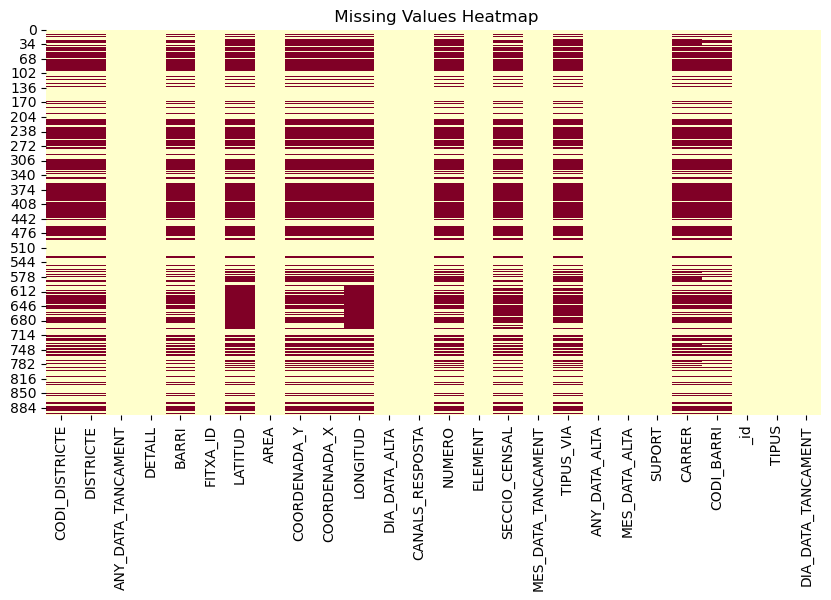

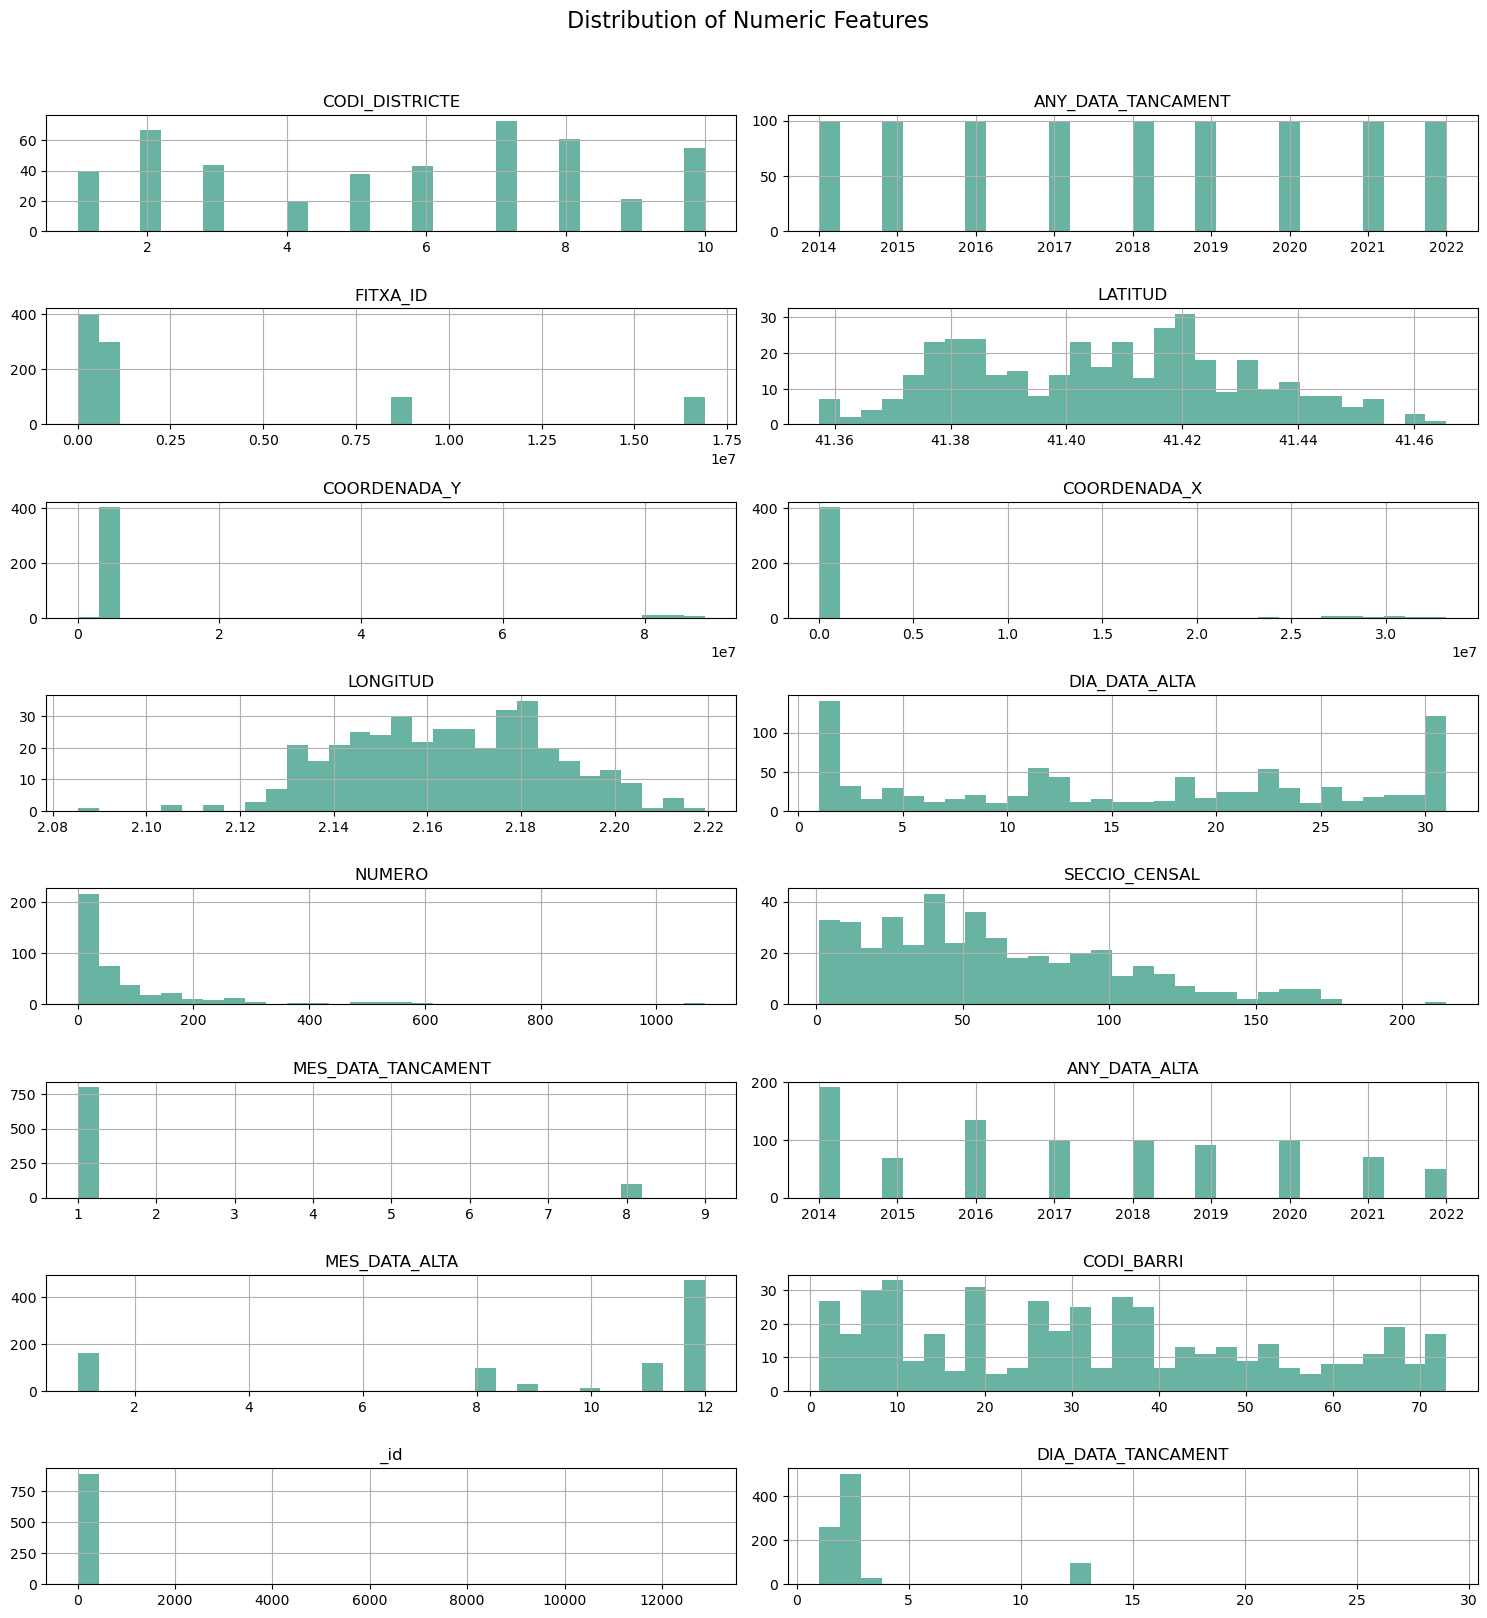

/tmp/ipykernel_155892/3329511863.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')


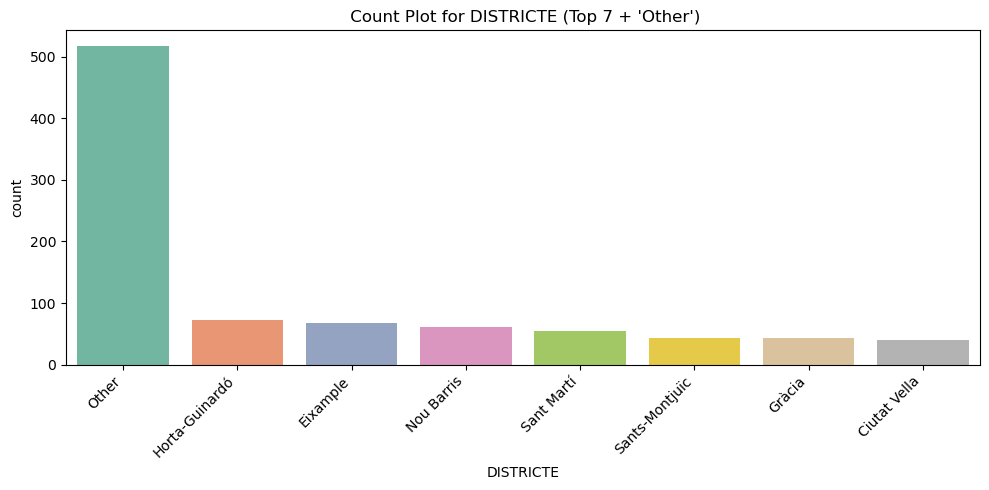

/tmp/ipykernel_155892/3329511863.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')


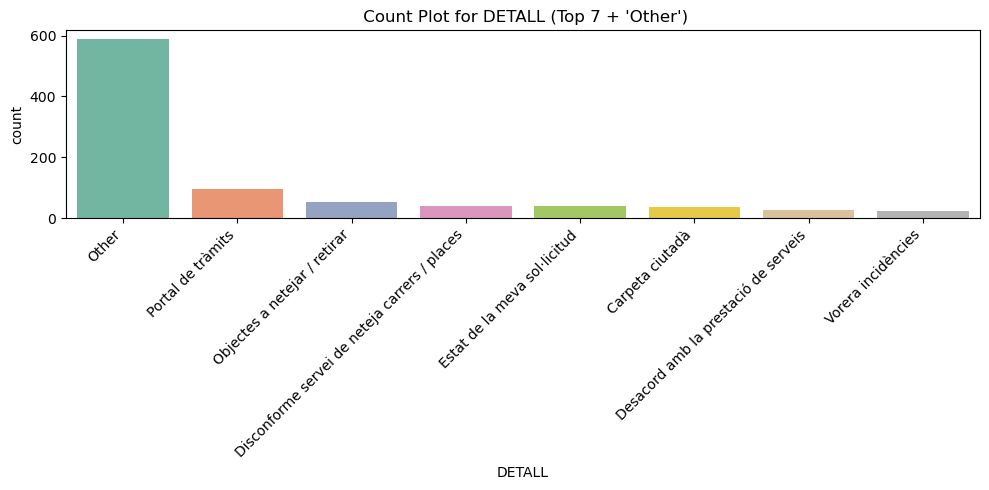

/tmp/ipykernel_155892/3329511863.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')


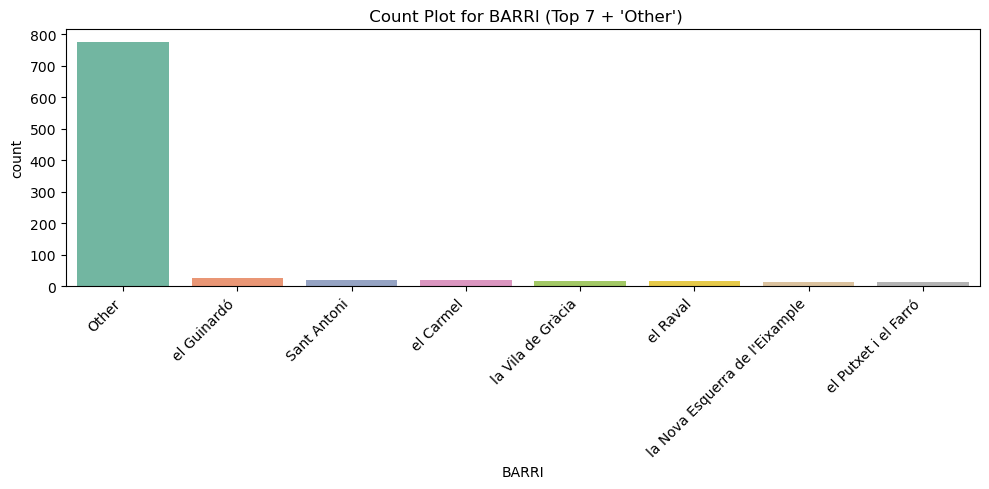

/tmp/ipykernel_155892/3329511863.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')


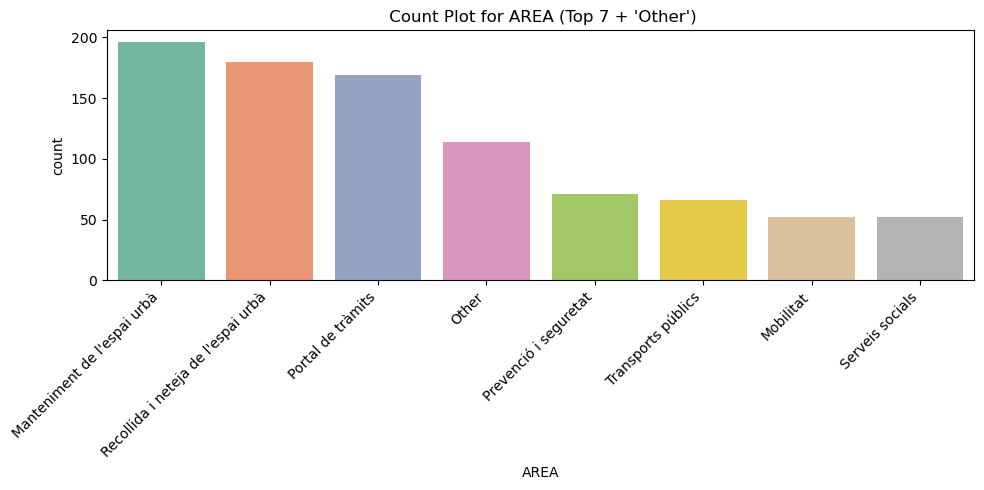

/tmp/ipykernel_155892/3329511863.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')


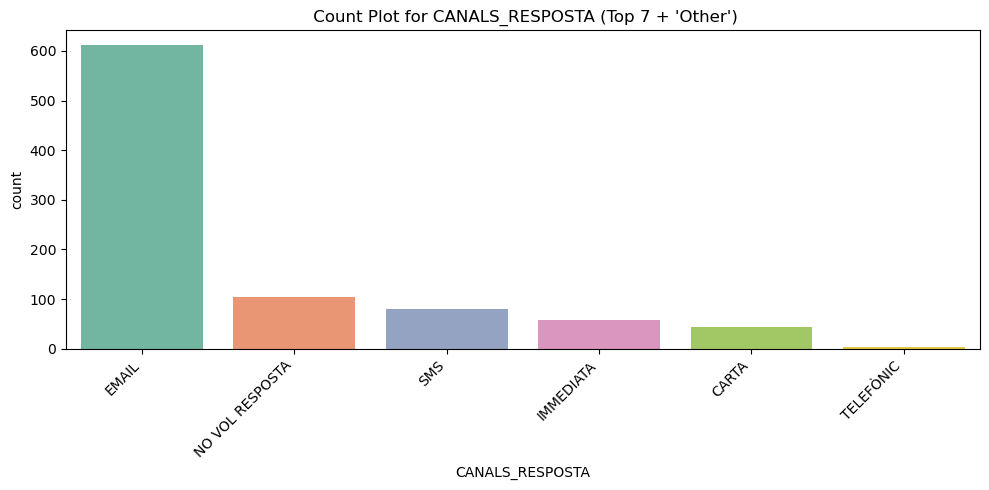

/tmp/ipykernel_155892/3329511863.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')


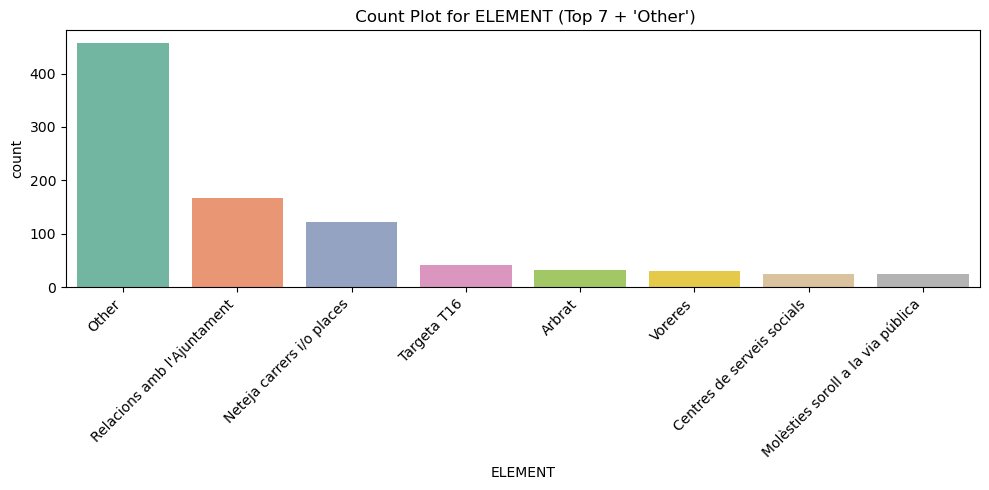

/tmp/ipykernel_155892/3329511863.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')


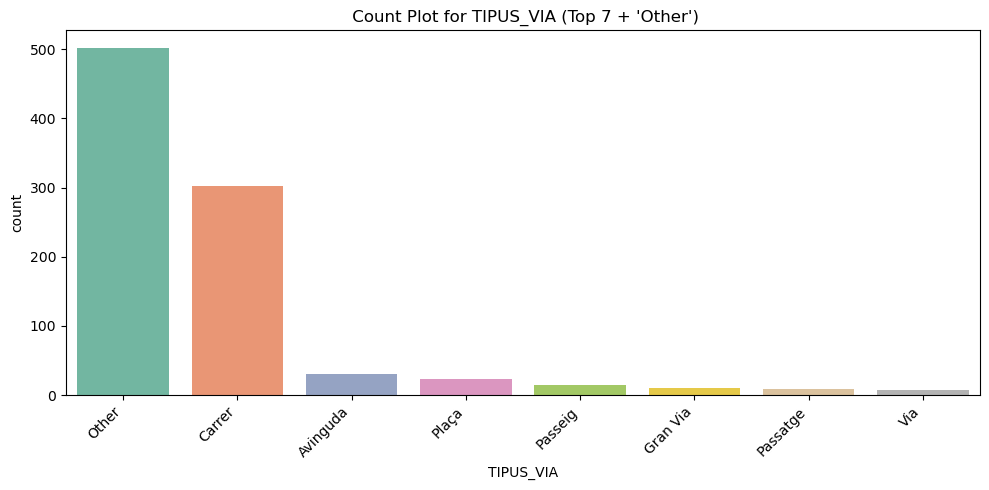

/tmp/ipykernel_155892/3329511863.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')


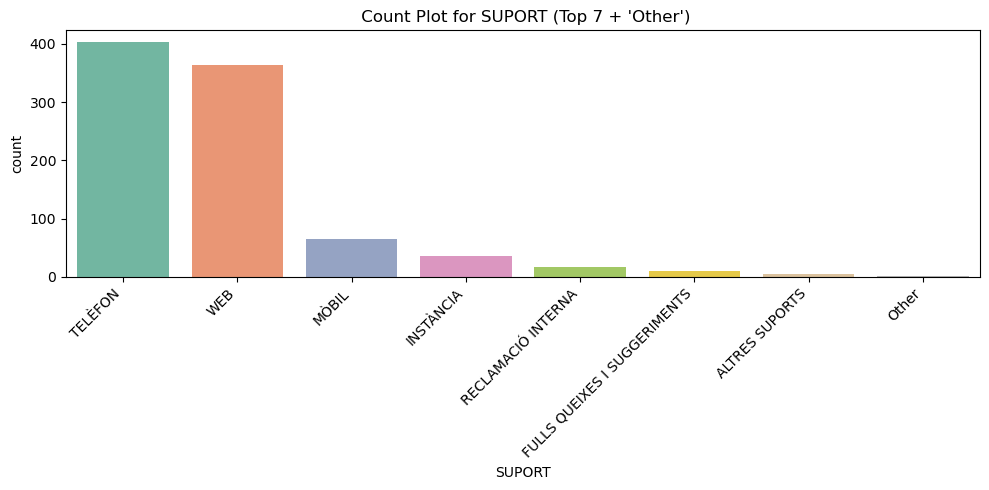

/tmp/ipykernel_155892/3329511863.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')


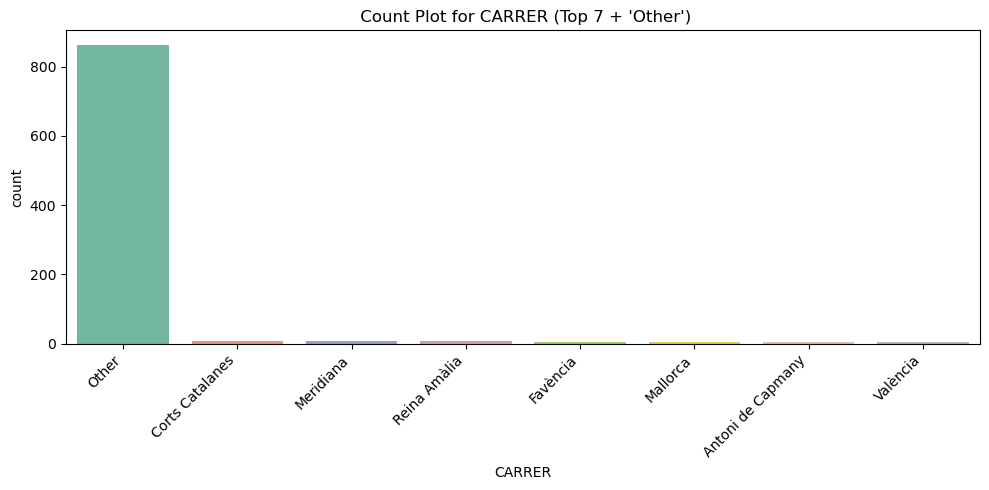

/tmp/ipykernel_155892/3329511863.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')


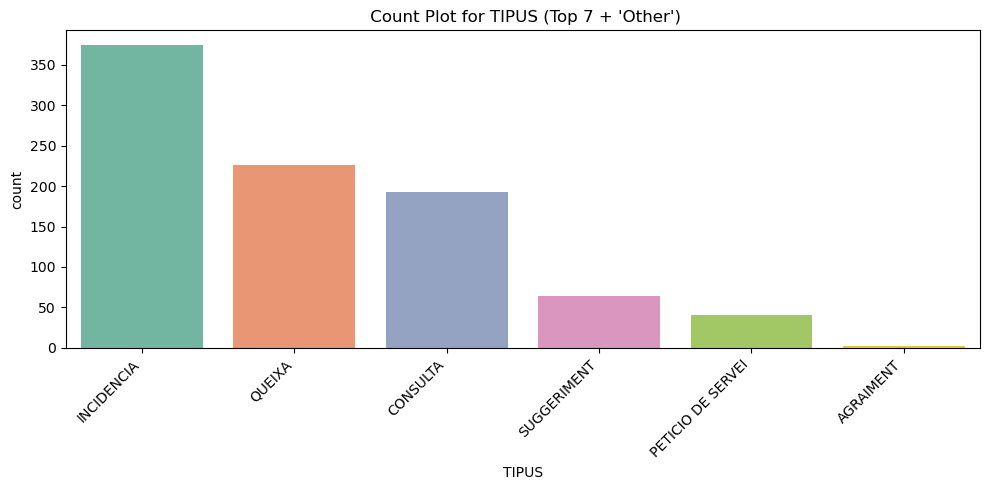

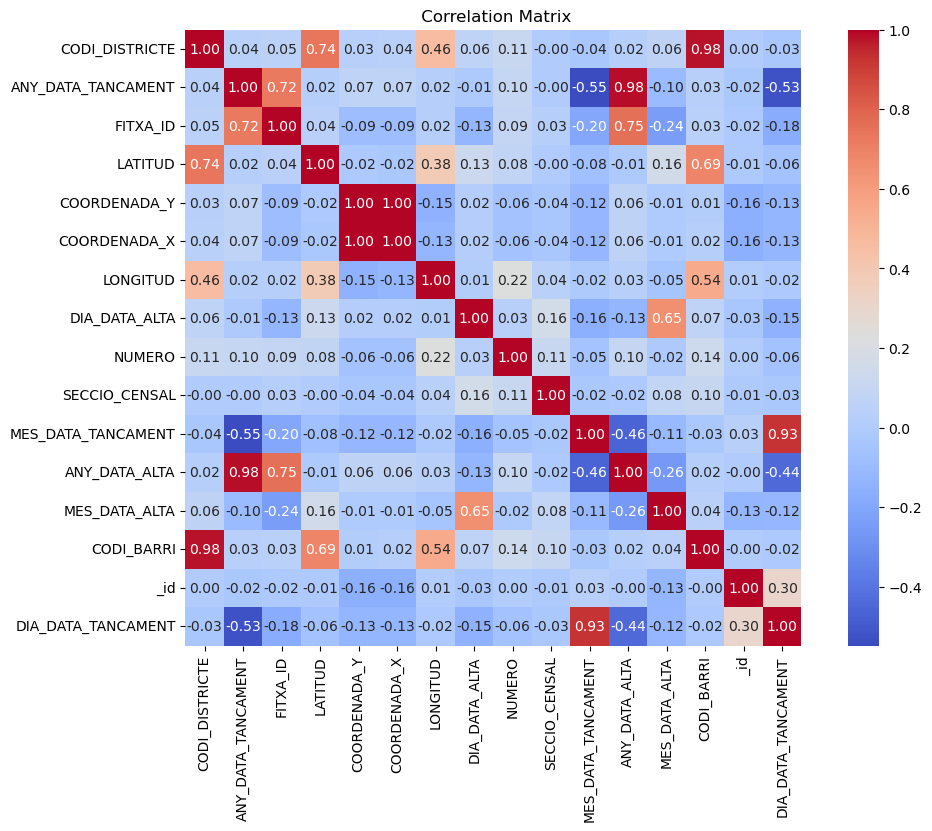


 EDA Report for: Income
------------------------------------------------------------
 Shape: 811 rows × 7 columns

 Column Types:
Any                           int64
Codi_Districte                int64
Nom_Districte                object
Codi_Barri                    int64
Nom_Barri                    object
Població                      int64
Índex RFD Barcelona = 100    object
dtype: object

 Missing Values (%):
No missing values

 Unique Values (Top 10):
Any: 11 unique values
Codi_Districte: 11 unique values
Nom_Districte: 11 unique values
Codi_Barri: 74 unique values
Nom_Barri: 74 unique values
Població: 799 unique values
Índex RFD Barcelona = 100: 644 unique values

 Summary Statistics:
                count          mean           std     min      25%      50%  \
Any             811.0   2011.993835      3.158951  2007.0   2009.0   2012.0   
Codi_Districte  811.0      7.161529      9.583283     1.0      4.0      7.0   
Codi_Barri      811.0     37.611591     21.857582     1.0    

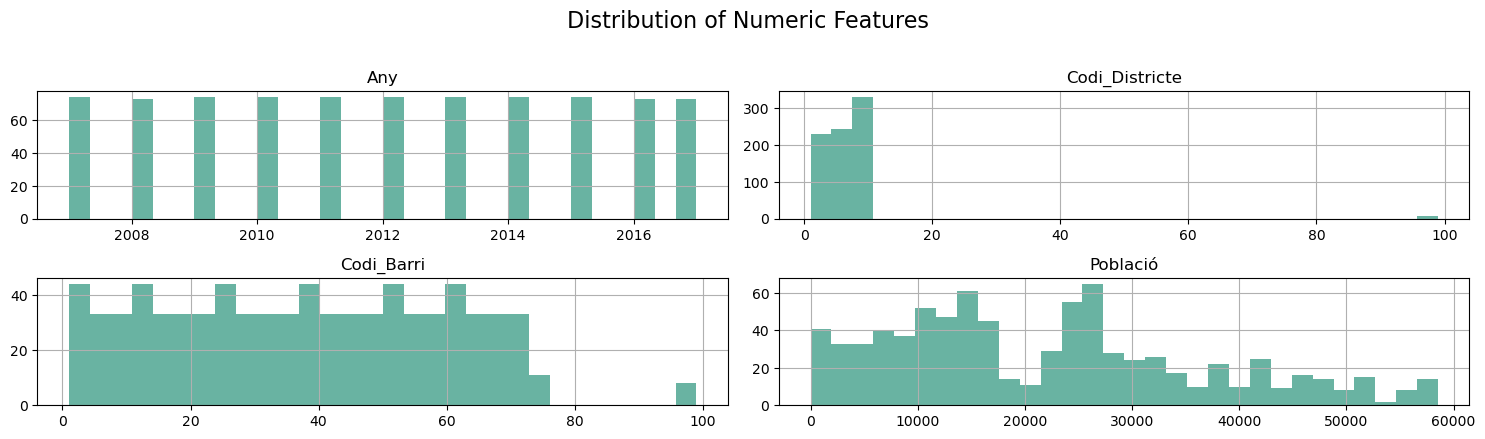

/tmp/ipykernel_155892/3329511863.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')


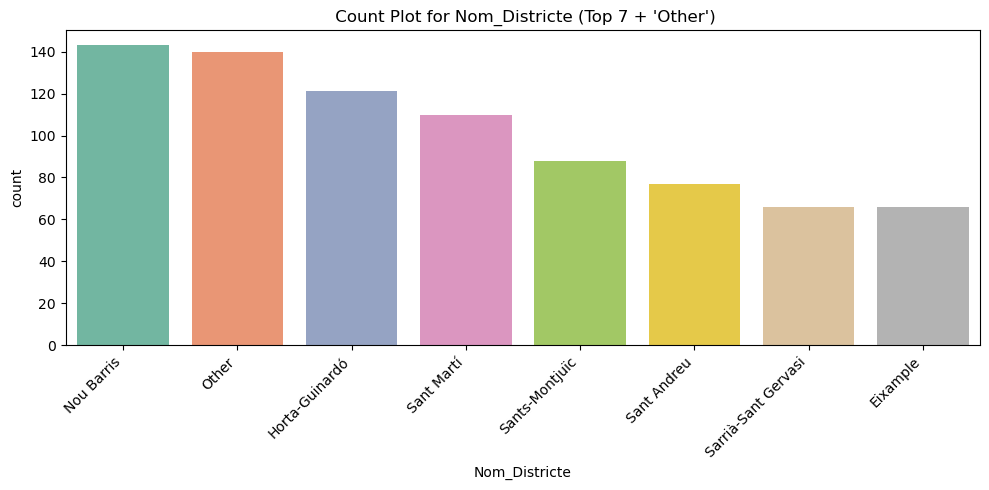

/tmp/ipykernel_155892/3329511863.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')


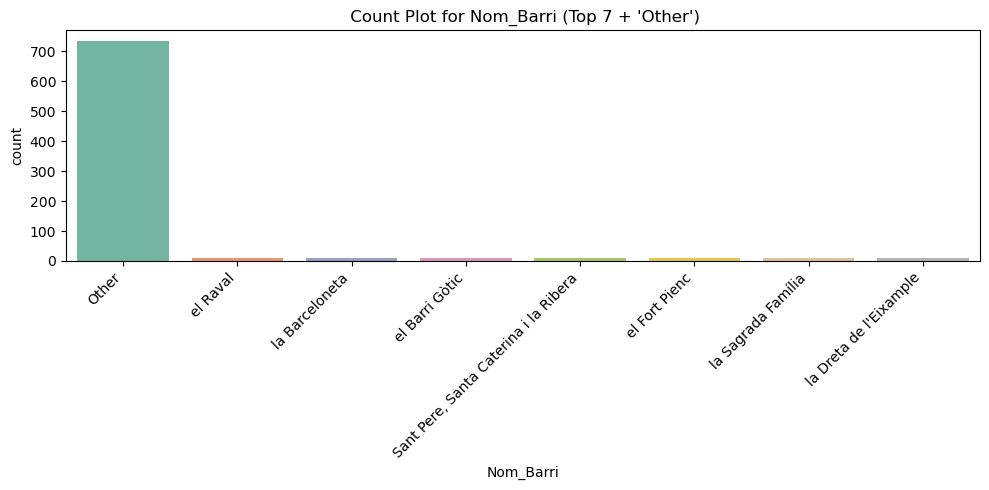

/tmp/ipykernel_155892/3329511863.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')


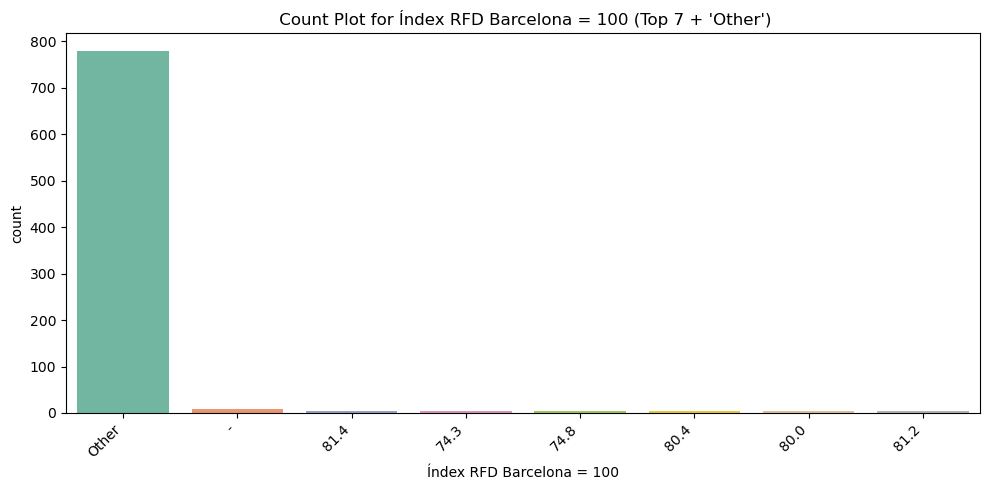

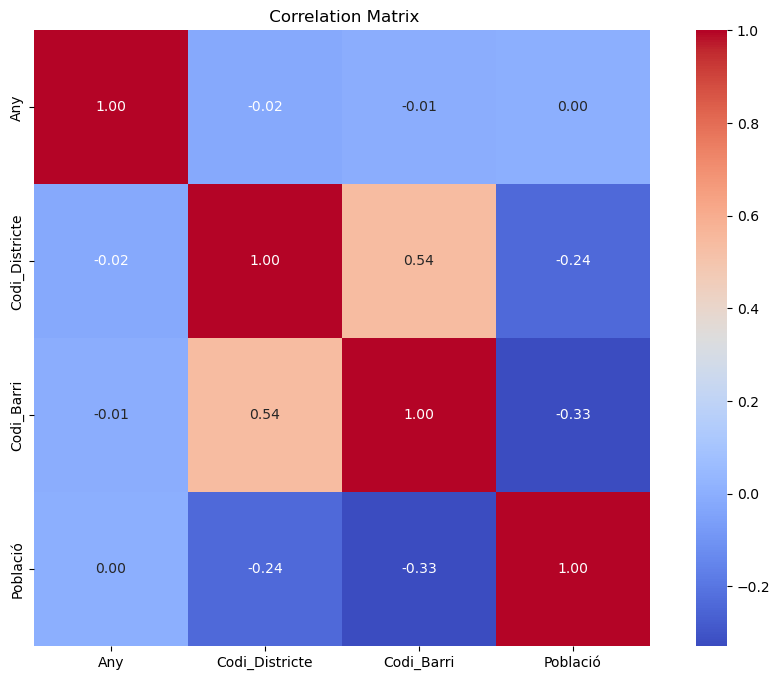


 EDA Report for: Unemployment
------------------------------------------------------------
 Shape: 1200 rows × 11 columns

 Column Types:
Codi_Districte      object
Sexe                object
Nom_Districte       object
Demanda_ocupació    object
Nom_Barri           object
Mes                 object
Codi_Barri          object
Nombre              object
_id                  int64
Any                 object
Demanda_ocupacio    object
dtype: object

 Missing Values (%):
Demanda_ocupacio    58.333333
Demanda_ocupació    41.666667
dtype: float64

 Unique Values (Top 10):
Codi_Districte: 11 unique values
Sexe: 2 unique values
Nom_Districte: 11 unique values
Demanda_ocupació: 2 unique values
Nom_Barri: 74 unique values
Mes: 2 unique values
Codi_Barri: 74 unique values
Nombre: 775 unique values
_id: 102 unique values
Any: 12 unique values

 Summary Statistics:
      count       mean        std  min    25%   50%    75%     max
_id  1200.0  51.728333  48.811628  1.0  25.75  50.5  75.25  1406.0



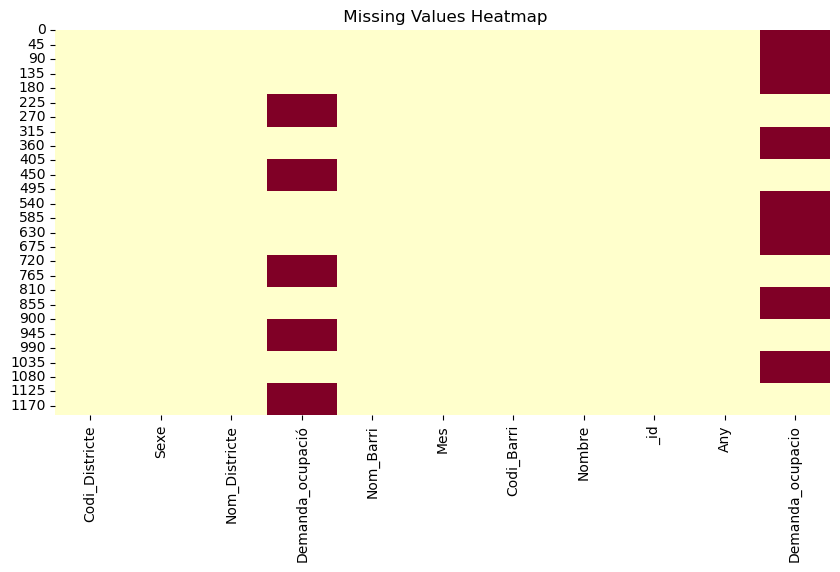

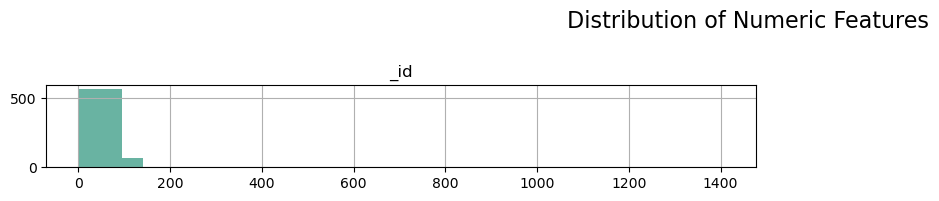

/tmp/ipykernel_155892/3329511863.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')


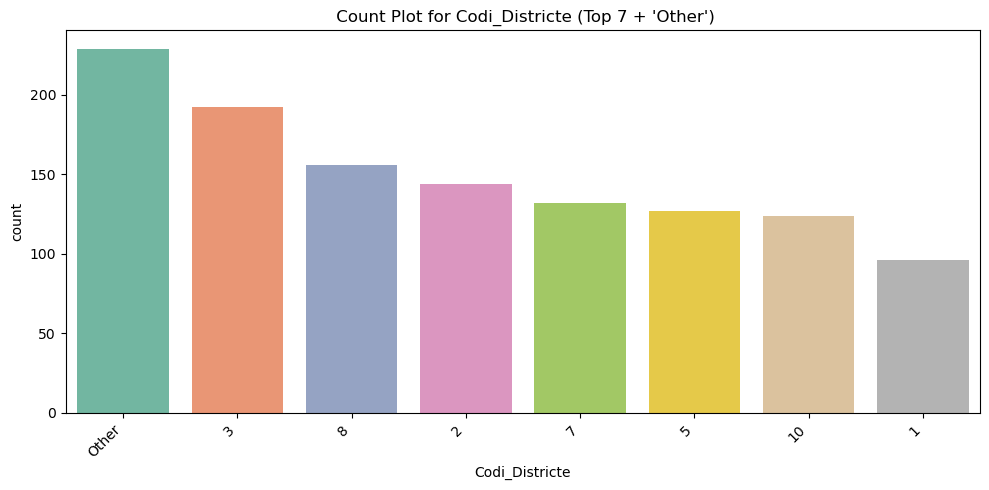

/tmp/ipykernel_155892/3329511863.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')


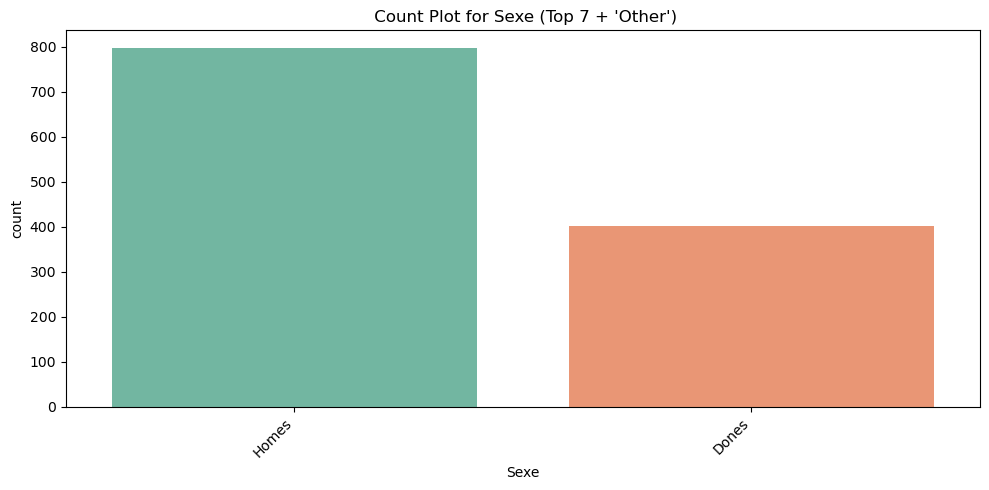

/tmp/ipykernel_155892/3329511863.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')


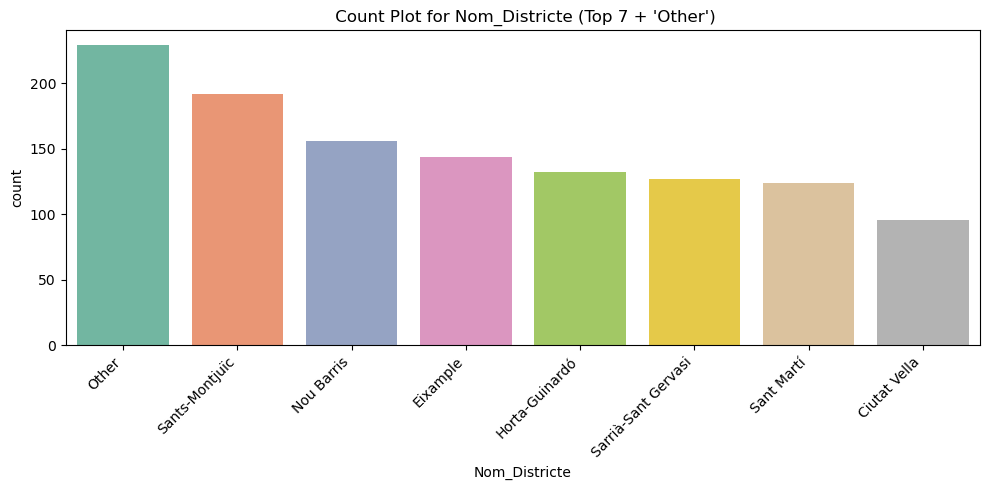

/tmp/ipykernel_155892/3329511863.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')


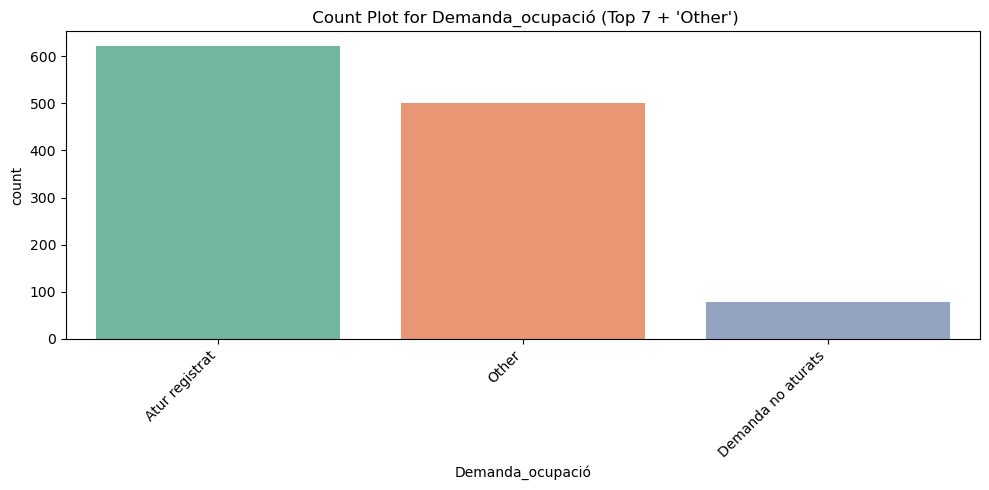

/tmp/ipykernel_155892/3329511863.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')


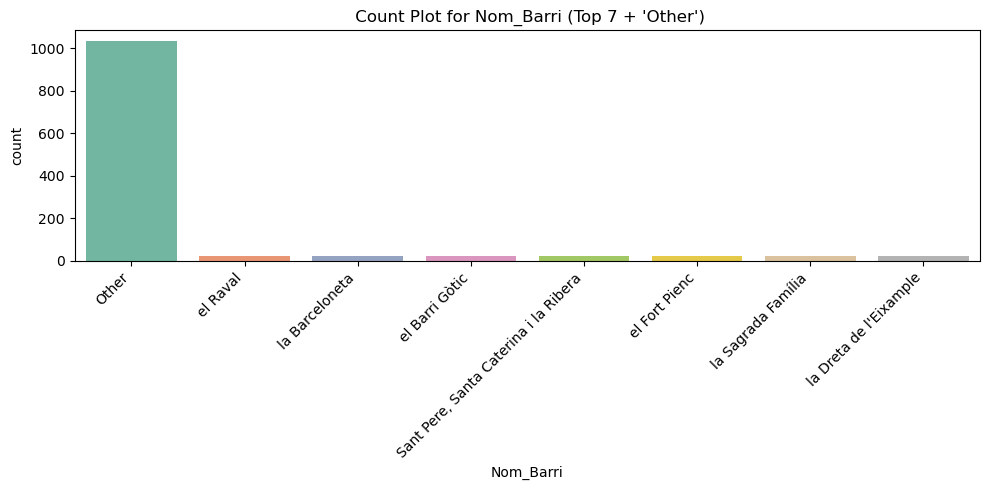

/tmp/ipykernel_155892/3329511863.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')


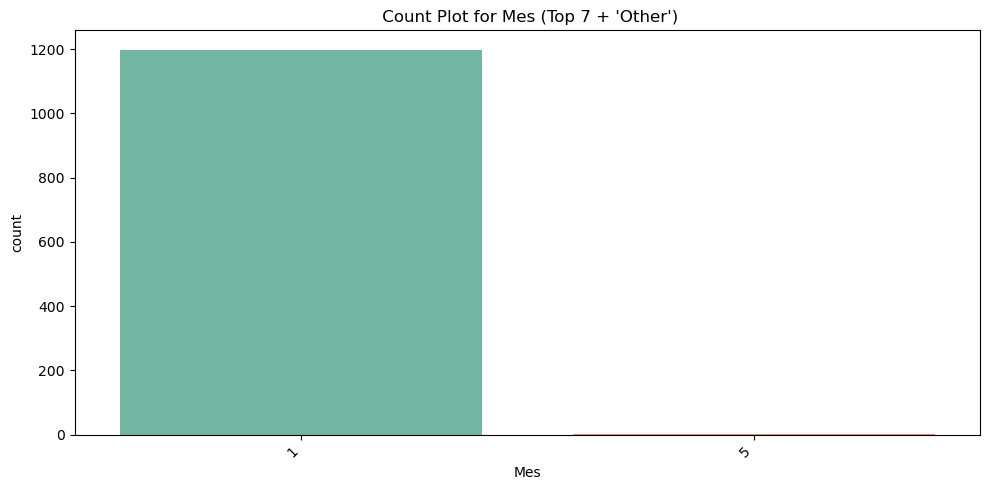

/tmp/ipykernel_155892/3329511863.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')


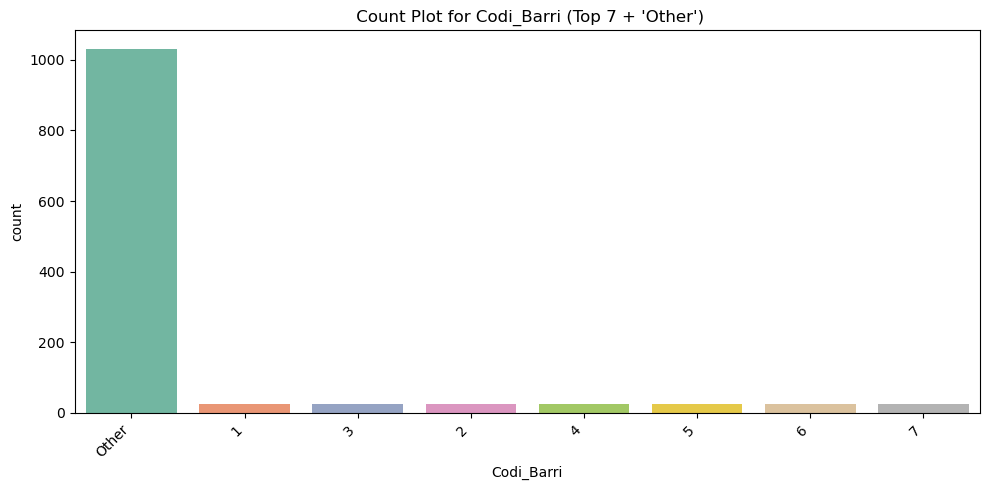

/tmp/ipykernel_155892/3329511863.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')


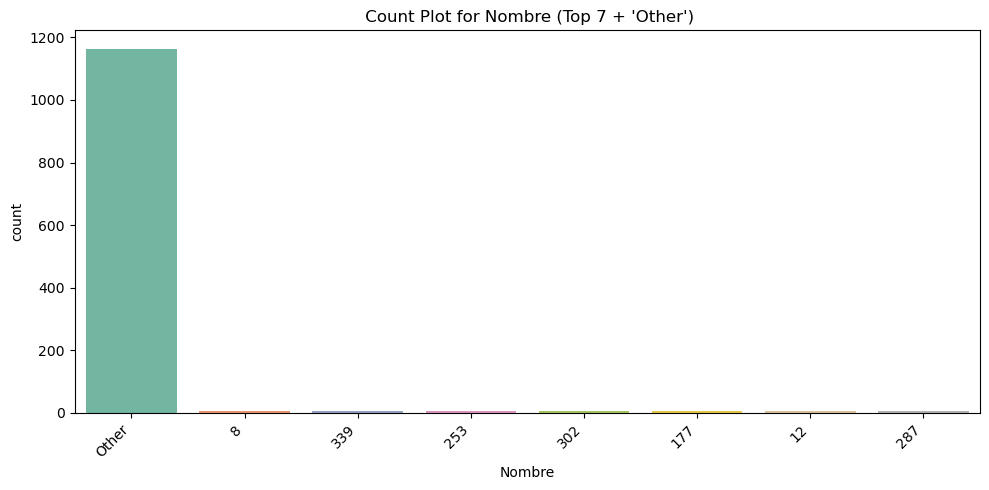

/tmp/ipykernel_155892/3329511863.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')


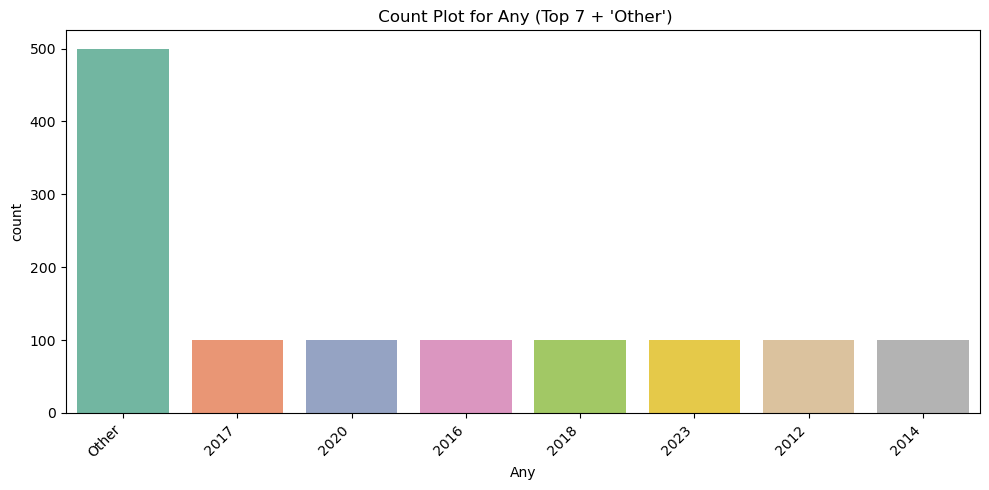

/tmp/ipykernel_155892/3329511863.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, x=col, order=df_plot[col].value_counts().index, palette='Set2')


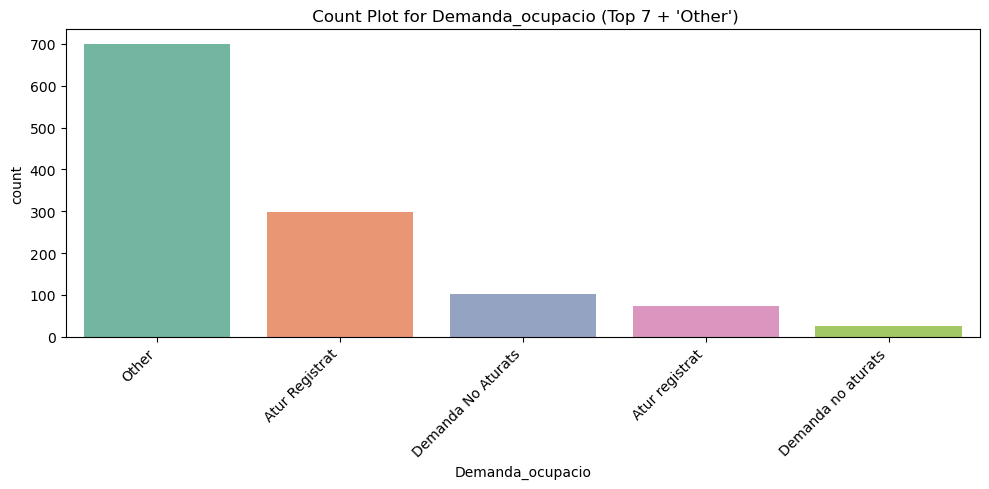

In [94]:
quick_eda(incident_df, name="Incidences")
quick_eda(income_df, name="Income")
quick_eda(unemployment_df, name="Unemployment")


Dataset: Income

| KPI                                                         | Description                      |
| ----------------------------------------------------------- | -------------------------------- |
| Average RFD (Relative Family Income Index) per district     | Measures average income level    |
| Districts with income above/below Barcelona's average (100) | Detect inequality                |
| Population-weighted income index                            | Accounts for district population |


Dataset: Incident

| KPI                                               | Description                |
| ------------------------------------------------- | -------------------------- |
| Total number of incidences per district           | Measures complaint density |
| Most common type of incidence                     | Find frequent issues       |
| Month with more incidences                        | Normalize for comparison   |



Dataset: Unemployment

| KPI                                          | Description                                   |
| -------------------------------------------- | --------------------------------------------- |
| Average unemployment rate by gender      | Assess unemployment by gender                           |
| Average unemployment per district                    | Regional economic pressure                    |
| % change in unemployment by district and year | Trend analysis  |


## **A.2  Data Formatting Process**

Create a directory on your local file system to serve as the Formatted Zone.
Write the required Spark jobs to read the raw data from the Landing Zone
(i.e. 3 datasets from the local file system), perform necessary transformations,
and write data in Parquet or Delta format in the Formatted Zone.
Ensure the data is partitioned appropriately for efficient querying.

In [526]:
from pyspark.sql import SparkSession
from pathlib import Path

# Initialize Spark
spark = SparkSession.builder \
    .appName("FormattedZoneETL") \
    .getOrCreate()

# Define landing and formatted zones
landing_zone = Path.cwd() / "datasets"
formatted_zone = Path.cwd() / "formatted_zone"
formatted_zone.mkdir(parents=True, exist_ok=True)  

25/06/22 21:06:20 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


now let's read from the landing zone

In [527]:
income_path = str(landing_zone / "income")
income_df = spark.read.option("header", True).option("inferSchema", True).csv(income_path)

In [528]:
income_df.printSchema()
income_df.show(5, truncate=False)

root
 |-- Any: integer (nullable = true)
 |-- Codi_Districte: integer (nullable = true)
 |-- Nom_Districte: string (nullable = true)
 |-- Codi_Barri: integer (nullable = true)
 |-- Nom_Barri: string (nullable = true)
 |-- Població: integer (nullable = true)
 |-- Índex RFD Barcelona = 100: string (nullable = true)

+----+--------------+-------------+----------+-------------------------------------+--------+-------------------------+
|Any |Codi_Districte|Nom_Districte|Codi_Barri|Nom_Barri                            |Població|Índex RFD Barcelona = 100|
+----+--------------+-------------+----------+-------------------------------------+--------+-------------------------+
|2013|1             |Ciutat Vella |1         |el Raval                             |49225   |60.3                     |
|2013|1             |Ciutat Vella |2         |el Barri Gòtic                       |16327   |103.6                    |
|2013|1             |Ciutat Vella |3         |la Barceloneta                       |

In [529]:
incident_path = str(landing_zone / "incidences")
incident_df = spark.read.option("header", True).option("inferSchema", True).csv(incident_path)

In [530]:
incident_df.printSchema()
incident_df.show(5, truncate=False)

root
 |-- CODI_DISTRICTE: integer (nullable = true)
 |-- DISTRICTE: string (nullable = true)
 |-- ANY_DATA_TANCAMENT: integer (nullable = true)
 |-- DETALL: string (nullable = true)
 |-- BARRI: string (nullable = true)
 |-- FITXA_ID: integer (nullable = true)
 |-- LATITUD: double (nullable = true)
 |-- AREA: string (nullable = true)
 |-- COORDENADA_Y: double (nullable = true)
 |-- COORDENADA_X: double (nullable = true)
 |-- LONGITUD: double (nullable = true)
 |-- DIA_DATA_ALTA: integer (nullable = true)
 |-- CANALS_RESPOSTA: string (nullable = true)
 |-- NUMERO: integer (nullable = true)
 |-- ELEMENT: string (nullable = true)
 |-- SECCIO_CENSAL: integer (nullable = true)
 |-- MES_DATA_TANCAMENT: integer (nullable = true)
 |-- TIPUS_VIA: string (nullable = true)
 |-- ANY_DATA_ALTA: integer (nullable = true)
 |-- MES_DATA_ALTA: integer (nullable = true)
 |-- SUPORT: string (nullable = true)
 |-- CARRER: string (nullable = true)
 |-- CODI_BARRI: integer (nullable = true)
 |-- _id: integer

In [531]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType, LongType
from pyspark.sql.functions import col
import pandas as pd

# Step 1: Read JSON
unemployment_path = str(landing_zone / "unemployment")
unemployment_raw_df = spark.read.option("multiline", True).json(unemployment_path)

unemployment_raw_df.printSchema()
unemployment_raw_df.show(5, truncate=False)

root
 |-- error: struct (nullable = true)
 |    |-- __type: string (nullable = true)
 |    |-- message: string (nullable = true)
 |-- help: string (nullable = true)
 |-- result: struct (nullable = true)
 |    |-- _links: struct (nullable = true)
 |    |    |-- next: string (nullable = true)
 |    |    |-- start: string (nullable = true)
 |    |-- fields: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- id: string (nullable = true)
 |    |    |    |-- type: string (nullable = true)
 |    |-- records: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- Any: string (nullable = true)
 |    |    |    |-- Codi_Barri: string (nullable = true)
 |    |    |    |-- Codi_Districte: string (nullable = true)
 |    |    |    |-- Demanda_ocupacio: string (nullable = true)
 |    |    |    |-- Demanda_ocupació: string (nullable = true)
 |    |    |    |-- Mes: string (nullable = true)
 |    |    |    |-- Nom_Ba

In [532]:
from pyspark.sql.functions import explode, col

# Step 2–5 (new): Explode and flatten the nested JSON structure
records_df = unemployment_raw_df.select(explode(col("result.records")).alias("record"))

# Flatten the nested 'record' struct directly to columns
unemployment_df = records_df.select("record.*")

# Step 6: Drop unwanted columns
unemployment_df = unemployment_df.drop("Constant")

from pyspark.sql.functions import regexp_replace, trim

# Step 7: Rename columns to English
unemployment_cleaned_df = unemployment_df.selectExpr(
    "cast(Any as int) as Year",
    "cast(Mes as int) as Month",
    "cast(Codi_Districte as int) as District_Code",
    "cast(Codi_Barri as int) as Neighborhood_Code",
    "`Demanda_ocupació` as Occupation_Request",
    "Nom_Barri as Neighborhood_Name",
    "Nom_Districte as District_Name",
    "cast(Nombre as int) as Count",
    "Sexe as Gender",
    "cast(_id as long) as Row_ID"
)

In [533]:
unemployment_cleaned_df.printSchema()
unemployment_cleaned_df.show(5, truncate=False)

root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- District_Code: integer (nullable = true)
 |-- Neighborhood_Code: integer (nullable = true)
 |-- Occupation_Request: string (nullable = true)
 |-- Neighborhood_Name: string (nullable = true)
 |-- District_Name: string (nullable = true)
 |-- Count: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Row_ID: long (nullable = true)

+----+-----+-------------+-----------------+------------------+-------------------------------------+-------------+-----+------+------+
|Year|Month|District_Code|Neighborhood_Code|Occupation_Request|Neighborhood_Name                    |District_Name|Count|Gender|Row_ID|
+----+-----+-------------+-----------------+------------------+-------------------------------------+-------------+-----+------+------+
|2016|1    |1            |1                |Atur registrat    |el Raval                             |Ciutat Vella |2431 |Homes |1     |
|2016|1    |1          

In [534]:
from pyspark.sql.functions import col

for col_name in unemployment_cleaned_df.columns:
    print(f"\n--- Value counts for column: {col_name} ---")
    unemployment_cleaned_df.groupBy(col_name).count().orderBy("count", ascending=False).show(100, truncate=False)


--- Value counts for column: Year ---
+----+-----+
|Year|count|
+----+-----+
|2016|100  |
|2017|100  |
|2018|100  |
|2013|100  |
|2014|100  |
|2012|100  |
|2011|100  |
|2021|100  |
|2023|100  |
|2022|100  |
|2019|100  |
|2020|100  |
+----+-----+


--- Value counts for column: Month ---
+-----+-----+
|Month|count|
+-----+-----+
|1    |1199 |
|5    |1    |
+-----+-----+


--- Value counts for column: District_Code ---
+-------------+-----+
|District_Code|count|
+-------------+-----+
|3            |192  |
|8            |156  |
|2            |144  |
|7            |132  |
|5            |127  |
|10           |124  |
|1            |96   |
|9            |84   |
|4            |72   |
|6            |60   |
|99           |13   |
+-------------+-----+


--- Value counts for column: Neighborhood_Code ---
+-----------------+-----+
|Neighborhood_Code|count|
+-----------------+-----+
|12               |24   |
|22               |24   |
|1                |24   |
|13               |24   |
|6            

In [535]:
# Function to print shape-like info
def print_spark_shape(df, name):
    num_rows = df.count()
    num_cols = len(df.columns)
    print(f"{name} shape: ({num_rows} rows, {num_cols} columns)")

# Apply to each DataFrame
print_spark_shape(unemployment_df, "Unemployment")
print_spark_shape(incident_df, "Incidents")
print_spark_shape(income_df, "Income")

Unemployment shape: (1200 rows, 11 columns)
Incidents shape: (900 rows, 26 columns)
Income shape: (811 rows, 7 columns)


Let's proceed with the data transformation

The "Índex RFD Barcelona = 100 is a string, so we will convert that to an integer.

In [536]:
from pyspark.sql.functions import col, regexp_replace, when

# Clean Index_RFD and convert comma to dot + handle dashes
income_cleaned_df = income_df \
    .withColumnRenamed("Índex RFD Barcelona = 100", "Index_RFD") \
    .withColumn("Index_RFD", regexp_replace(col("Index_RFD"), ",", ".")) \
    .withColumn("Index_RFD", when(col("Index_RFD") == "-", None).otherwise(col("Index_RFD"))) \
    .withColumn("Index_RFD", col("Index_RFD").cast("float")) \
    .filter(col("Index_RFD").isNotNull())

# Rename all relevant columns to English
income_cleaned_df = income_cleaned_df \
    .withColumnRenamed("Any", "Year") \
    .withColumnRenamed("Codi_Districte", "District_Code") \
    .withColumnRenamed("Nom_Districte", "District_Name") \
    .withColumnRenamed("Codi_Barri", "Neighborhood_Code") \
    .withColumnRenamed("Nom_Barri", "Neighborhood_Name") \
    .withColumnRenamed("Població", "Population") \
    .withColumnRenamed("Index_RFD", "Income_Index")

In [537]:
income_cleaned_df.printSchema()
income_cleaned_df.show(5, truncate=False)

root
 |-- Year: integer (nullable = true)
 |-- District_Code: integer (nullable = true)
 |-- District_Name: string (nullable = true)
 |-- Neighborhood_Code: integer (nullable = true)
 |-- Neighborhood_Name: string (nullable = true)
 |-- Population: integer (nullable = true)
 |-- Income_Index: float (nullable = true)

+----+-------------+-------------+-----------------+-------------------------------------+----------+------------+
|Year|District_Code|District_Name|Neighborhood_Code|Neighborhood_Name                    |Population|Income_Index|
+----+-------------+-------------+-----------------+-------------------------------------+----------+------------+
|2013|1            |Ciutat Vella |1                |el Raval                             |49225     |60.3        |
|2013|1            |Ciutat Vella |2                |el Barri Gòtic                       |16327     |103.6       |
|2013|1            |Ciutat Vella |3                |la Barceloneta                       |15571     |82.1 

now let's write the transformed income table to the formatted zone

In [538]:
income_cleaned_df.write \
    .partitionBy("District_Name") \
    .mode("overwrite") \
    .parquet(str(formatted_zone / "income"))

lets move onto the incidence

In [539]:
incident_cleaned_df = incident_df \
    .withColumnRenamed("CODI_DISTRICTE", "District_Code") \
    .withColumnRenamed("DISTRICTE", "District_Name") \
    .withColumnRenamed("ANY_DATA_TANCAMENT", "Closure_Year") \
    .withColumnRenamed("MES_DATA_TANCAMENT", "Closure_Month") \
    .withColumnRenamed("DIA_DATA_TANCAMENT", "Closure_Day") \
    .withColumnRenamed("DETALL", "Details") \
    .withColumnRenamed("BARRI", "Neighborhood_Name") \
    .withColumnRenamed("CODI_BARRI", "Neighborhood_Code") \
    .withColumnRenamed("LATITUD", "Latitude") \
    .withColumnRenamed("LONGITUD", "Longitude") \
    .withColumnRenamed("COORDENADA_X", "Coord_X") \
    .withColumnRenamed("COORDENADA_Y", "Coord_Y") \
    .withColumnRenamed("TIPUS", "Type") \
    .withColumnRenamed("TIPUS_VIA", "Street_Type") \
    .withColumnRenamed("CARRER", "Street_Name") \
    .withColumnRenamed("FITXA_ID", "Record_ID") \
    .withColumnRenamed("CANALS_RESPOSTA", "Response_Channel") \
    .withColumnRenamed("ELEMENT", "Element") \
    .withColumnRenamed("AREA", "Area") \
    .withColumnRenamed("ANY_DATA_ALTA", "Creation_Year") \
    .withColumnRenamed("MES_DATA_ALTA", "Creation_Month") \
    .withColumnRenamed("DIA_DATA_ALTA", "Creation_Day") \
    .withColumnRenamed("SUPORT", "Support_Channel") \
    .withColumnRenamed("SECCIO_CENSAL", "Census_Section") \
    .withColumnRenamed("_id", "Internal_ID")

In [540]:
incident_cleaned_df.printSchema()
incident_cleaned_df.show(5, truncate=False)

root
 |-- District_Code: integer (nullable = true)
 |-- District_Name: string (nullable = true)
 |-- Closure_Year: integer (nullable = true)
 |-- Details: string (nullable = true)
 |-- Neighborhood_Name: string (nullable = true)
 |-- Record_ID: integer (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Area: string (nullable = true)
 |-- Coord_Y: double (nullable = true)
 |-- Coord_X: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Creation_Day: integer (nullable = true)
 |-- Response_Channel: string (nullable = true)
 |-- NUMERO: integer (nullable = true)
 |-- Element: string (nullable = true)
 |-- Census_Section: integer (nullable = true)
 |-- Closure_Month: integer (nullable = true)
 |-- Street_Type: string (nullable = true)
 |-- Creation_Year: integer (nullable = true)
 |-- Creation_Month: integer (nullable = true)
 |-- Support_Channel: string (nullable = true)
 |-- Street_Name: string (nullable = true)
 |-- Neighborhood_Code: integer (nullable = 

In [541]:
preferred_order = [
    "Record_ID", "Internal_ID", "Type", "Details",
    "District_Code", "District_Name", "Neighborhood_Code", "Neighborhood_Name",
    "Closure_Year", "Closure_Month", "Closure_Day",
    "Creation_Year", "Creation_Month", "Creation_Day",
    "Latitude", "Longitude", "Coord_X", "Coord_Y",
    "Street_Type", "Street_Name", "Census_Section", "NUMERO",
    "Response_Channel", "Support_Channel", "Element", "Area"
]

incident_cleaned_df = incident_cleaned_df.select(preferred_order)

In [542]:
from pyspark.sql.functions import when, col

incident_cleaned_df = incident_cleaned_df.withColumn(
    "District_Name",
    when(col("District_Name") == "Sarrià - Sant Gervasi", "Sarrià-Sant Gervasi")
    .otherwise(col("District_Name"))
)

In [543]:
incident_cleaned_df.printSchema()
incident_cleaned_df.show(5, truncate=False)

root
 |-- Record_ID: integer (nullable = true)
 |-- Internal_ID: integer (nullable = true)
 |-- Type: string (nullable = true)
 |-- Details: string (nullable = true)
 |-- District_Code: integer (nullable = true)
 |-- District_Name: string (nullable = true)
 |-- Neighborhood_Code: integer (nullable = true)
 |-- Neighborhood_Name: string (nullable = true)
 |-- Closure_Year: integer (nullable = true)
 |-- Closure_Month: integer (nullable = true)
 |-- Closure_Day: integer (nullable = true)
 |-- Creation_Year: integer (nullable = true)
 |-- Creation_Month: integer (nullable = true)
 |-- Creation_Day: integer (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Coord_X: double (nullable = true)
 |-- Coord_Y: double (nullable = true)
 |-- Street_Type: string (nullable = true)
 |-- Street_Name: string (nullable = true)
 |-- Census_Section: integer (nullable = true)
 |-- NUMERO: integer (nullable = true)
 |-- Response_Channel: string (nullable 

In [544]:
incident_cleaned_df.write \
    .partitionBy("District_Name") \
    .mode("overwrite") \
    .parquet(str(formatted_zone / "incidences"))

lets move onto unemployment

In [545]:
unemployment_cleaned_df.printSchema()
unemployment_cleaned_df.show(5, truncate=False)

root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- District_Code: integer (nullable = true)
 |-- Neighborhood_Code: integer (nullable = true)
 |-- Occupation_Request: string (nullable = true)
 |-- Neighborhood_Name: string (nullable = true)
 |-- District_Name: string (nullable = true)
 |-- Count: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Row_ID: long (nullable = true)

+----+-----+-------------+-----------------+------------------+-------------------------------------+-------------+-----+------+------+
|Year|Month|District_Code|Neighborhood_Code|Occupation_Request|Neighborhood_Name                    |District_Name|Count|Gender|Row_ID|
+----+-----+-------------+-----------------+------------------+-------------------------------------+-------------+-----+------+------+
|2016|1    |1            |1                |Atur registrat    |el Raval                             |Ciutat Vella |2431 |Homes |1     |
|2016|1    |1          

In [546]:
unemployment_cleaned_df.write \
    .partitionBy("Year") \
    .mode("overwrite") \
    .parquet(str(formatted_zone / "unemployment"))

In [547]:
from pyspark.sql.functions import countDistinct

for dataset in ["income", "unemployment", "incidences"]:
    print(f"\nPreviewing formatted_zone/{dataset}")
    df = spark.read.parquet(str(formatted_zone / dataset))
    df.printSchema()
    df.show(3)
    df.select([countDistinct(c).alias(f"{c}_distinct") for c in df.columns]).show()


Previewing formatted_zone/income
root
 |-- Year: integer (nullable = true)
 |-- District_Code: integer (nullable = true)
 |-- Neighborhood_Code: integer (nullable = true)
 |-- Neighborhood_Name: string (nullable = true)
 |-- Population: integer (nullable = true)
 |-- Income_Index: float (nullable = true)
 |-- District_Name: string (nullable = true)

+----+-------------+-----------------+--------------------+----------+------------+-------------+
|Year|District_Code|Neighborhood_Code|   Neighborhood_Name|Population|Income_Index|District_Name|
+----+-------------+-----------------+--------------------+----------+------------+-------------+
|2010|           10|               64|el Camp de l'Arpa...|     38399|        84.6|   Sant Martí|
|2010|           10|               65|             el Clot|     27505|        82.8|   Sant Martí|
|2010|           10|               66|el Parc i la Llac...|     13728|        97.3|   Sant Martí|
+----+-------------+-----------------+--------------------+

## **A.3 Move Data to the Exploitation Zone**


In [548]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Exploitation Zone Pipeline") \
    .getOrCreate()


25/06/22 21:06:25 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [549]:
formatted_zone = Path.cwd() / "formatted_zone"

incident_df = spark.read.option("basePath", str(formatted_zone / "incidences")) \
    .parquet(str(formatted_zone / "incidences"))

income_df = spark.read.option("basePath", str(formatted_zone / "income")) \
    .parquet(str(formatted_zone / "income"))

unemployment_df = spark.read.option("basePath", str(formatted_zone / "unemployment")) \
    .parquet(str(formatted_zone / "unemployment"))


**Transformations to support KPI analysis**

before we begin, lets check which datasets have overlapping years

Dataset: Incidences

In [550]:
income_df.printSchema()
income_df.show(5, truncate=False)

root
 |-- Year: integer (nullable = true)
 |-- District_Code: integer (nullable = true)
 |-- Neighborhood_Code: integer (nullable = true)
 |-- Neighborhood_Name: string (nullable = true)
 |-- Population: integer (nullable = true)
 |-- Income_Index: float (nullable = true)
 |-- District_Name: string (nullable = true)

+----+-------------+-----------------+---------------------------------+----------+------------+-------------+
|Year|District_Code|Neighborhood_Code|Neighborhood_Name                |Population|Income_Index|District_Name|
+----+-------------+-----------------+---------------------------------+----------+------------+-------------+
|2010|10           |64               |el Camp de l'Arpa del Clot       |38399     |84.6        |Sant Martí   |
|2010|10           |65               |el Clot                          |27505     |82.8        |Sant Martí   |
|2010|10           |66               |el Parc i la Llacuna del Poblenou|13728     |97.3        |Sant Martí   |
|2010|10       

Dataset: Incident

In [551]:
# Count of each District_Code
incident_df.groupBy("District_Code").count().orderBy("count", ascending=False).show()

# Count of each District_Name
incident_df.groupBy("District_Name").count().orderBy("count", ascending=False).show()

+-------------+-----+
|District_Code|count|
+-------------+-----+
|         NULL|  438|
|            7|   73|
|            2|   67|
|            8|   61|
|           10|   55|
|            3|   44|
|            6|   43|
|            1|   40|
|            5|   38|
|            9|   21|
|            4|   20|
+-------------+-----+

+-------------------+-----+
|      District_Name|count|
+-------------------+-----+
|               NULL|  438|
|     Horta-Guinardó|   73|
|           Eixample|   67|
|         Nou Barris|   61|
|         Sant Martí|   55|
|     Sants-Montjuïc|   44|
|             Gràcia|   43|
|       Ciutat Vella|   40|
|Sarrià-Sant Gervasi|   38|
|        Sant Andreu|   21|
|          Les Corts|   20|
+-------------------+-----+



In [552]:
# Show rows where District_Code is NULL
incident_df.filter(col("District_Code").isNull()).show(10, truncate=False)

+---------+-----------+----------+-------------------------------------------+-------------+-----------------+-----------------+------------+-------------+-----------+-------------+--------------+------------+--------+---------+-------+-------+-----------+-----------+--------------+------+----------------+---------------+-----------------------------------------+----------------------------------------+-------------+
|Record_ID|Internal_ID|Type      |Details                                    |District_Code|Neighborhood_Code|Neighborhood_Name|Closure_Year|Closure_Month|Closure_Day|Creation_Year|Creation_Month|Creation_Day|Latitude|Longitude|Coord_X|Coord_Y|Street_Type|Street_Name|Census_Section|NUMERO|Response_Channel|Support_Channel|Element                                  |Area                                    |District_Name|
+---------+-----------+----------+-------------------------------------------+-------------+-----------------+-----------------+------------+-------------+---

In [553]:
from pyspark.sql.functions import col, count
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number
from pyspark.sql.functions import month

incident_df = incident_df.fillna({"District_Code": -1, "District_Name": "Unknown"})

incident_kpi1 = (
    incident_df
    .groupBy("District_Code", "Creation_Year")
    .agg(count("*").alias("total_incidences"))
    .orderBy("District_Code", "Creation_Year")
)

# Count per group
incident_types = (
    incident_df
    .groupBy("District_Code", "Creation_Year", "Details")
    .agg(count("*").alias("count"))
)

# Window to rank by frequency
window_spec = Window.partitionBy("District_Code", "Creation_Year").orderBy(col("count").desc())

incident_kpi2 = (
    incident_types
    .withColumn("rank", row_number().over(window_spec))
    .filter(col("rank") == 1)  # Only most common per group
    .drop("rank")
    .orderBy("District_Code", "Creation_Year")
)

# Just count per month
incident_monthly_counts = (
    incident_df
    .groupBy("District_Code", "Creation_Year", "Creation_Month")
    .agg(count("*").alias("monthly_incidents"))
)

# Get top month by count per district-year
window_month = Window.partitionBy("District_Code", "Creation_Year").orderBy(col("monthly_incidents").desc())

incident_kpi3 = (
    incident_monthly_counts
    .withColumn("rank", row_number().over(window_month))
    .filter(col("rank") == 1)
    .drop("rank")
    .orderBy("District_Code", "Creation_Year")
)

Dataset: Income

In [554]:
from pyspark.sql.functions import avg, sum as _sum, when, col

# Ensure proper types
income_df = income_df.withColumn("RFD", col("Income_Index").cast("float")) \
                     .withColumn("Population", col("Population").cast("int"))

# Add weighted income column
income_df = income_df.withColumn("weighted", col("RFD") * col("Population"))

# 1. Average RFD per district and year
income_kpi1 = income_df.groupBy("District_Code", "Year").agg(
    avg("RFD").alias("avg_RFD")
)

# 2. Above/below average (global benchmark = 100)
income_kpi2 = income_kpi1.withColumn(
    "above_avg", when(col("avg_RFD") > 100, "Above").otherwise("Below")
)

# 3. Population-weighted income index
income_kpi3 = income_df.groupBy("District_Code", "Year").agg(
    (_sum("weighted") / _sum("Population")).alias("population_weighted_RFD")
)

Dataset: Unemployment

In [555]:
from pyspark.sql.window import Window
from pyspark.sql.functions import lag, round, avg, col
from pyspark.sql.functions import when


# Prepare unemployment value from Count
unemployment_df = unemployment_df.withColumn("Unemp", col("Count").cast("float"))

# KPI 1: Average unemployment rate by gender and district and year
unemp_kpi1 = unemployment_df.groupBy("District_Code","Year", "Gender").agg(
    avg("Unemp").alias("avg_unemployment_rate_by_gender_year")
)

# KPI 2: Average unemployment rate per district **and year**
unemp_kpi2 = unemployment_df.groupBy("District_Code", "Year").agg(
    avg("Unemp").alias("avg_unemployment_rate_per_district_year")
)

# KPI 3: % change in unemployment by district **over years**
window = Window.partitionBy("District_Code").orderBy("Year")
unemployment_df = unemployment_df.withColumn("prev", lag("Unemp").over(window))
unemployment_df = unemployment_df.withColumn("pct_change",
    when(col("prev") == 0, None)  # Avoid division by zero
    .otherwise(round(((col("Unemp") - col("prev")) / col("prev")) * 100, 2))
)

unemp_kpi3 = unemployment_df.select(
    "District_Code", "Year", "Unemp", "pct_change"
).filter(col("pct_change").isNotNull())

In [556]:
#
# Dataset: Incidences
#

# from pyspark.sql.functions import col, count, month

# # Total number of incidences per district
# incident_kpi1 = incident_df.groupBy("District_Name").agg(count("*").alias("total_incidences"))

# # Most common type of incidencedo 
# incident_kpi2 = incident_df.groupBy("Details").agg(count("*").alias("count")).orderBy(col("count").desc())

# # Month with more incidences
# incident_df = incident_df.withColumn("month", col("Creation_Month").cast("int"))
# incident_kpi3 = incident_df.groupBy("month").agg(count("*").alias("total")).orderBy(col("total").desc())


In [557]:
#
#
# Dataset: Income

# from pyspark.sql.functions import avg, sum as _sum, when

# income_df = income_df.withColumn("RFD", col("Income_Index").cast("float")) \
#                      .withColumn("Population", col("Population").cast("int"))

# # Average RFD per district
# income_kpi1 = income_df.groupBy("District_Name").agg(avg("RFD").alias("avg_RFD"))

# # Above/below average RFD
# income_kpi2 = income_kpi1.withColumn("above_avg", when(col("avg_RFD") > 100, "Above").otherwise("Below"))

# # Population-weighted income
# income_df = income_df.withColumn("weighted", col("RFD") * col("Population"))
# income_kpi3 = income_df.groupBy("District_Name") \
#     .agg((_sum("weighted") / _sum("Population")).alias("population_weighted_RFD"))


In [558]:
#
# # Dataset: Unemployment
#

# from pyspark.sql.window import Window
# from pyspark.sql.functions import lag, round, avg, col

# # Prepare unemployment value from Count
# unemployment_df = unemployment_df.withColumn("Unemp", col("Count").cast("float"))

# # KPI 1: Average unemployment rate by year (city-wide)
# unemp_kpi1 = unemployment_df.groupBy("Year").agg(
#     avg("Unemp").alias("overall_unemployment_rate_by_year")
# )

# # KPI 2: Average unemployment rate per district
# unemp_kpi2 = unemployment_df.groupBy("District_Code", "District_Name").agg(
#     avg("Unemp").alias("avg_unemployment_rate_per_district")
# )

# # KPI 3: % change in unemployment by district and year
# window = Window.partitionBy("District_Code").orderBy("Year")
# unemployment_df = unemployment_df.withColumn("prev", lag("Unemp").over(window))
# unemployment_df = unemployment_df.withColumn(
#     "pct_change",
#     round(((col("Unemp") - col("prev")) / col("prev")) * 100, 2)
# )

# unemp_kpi3 = unemployment_df.select(
#     "District_Code", "District_Name", "Year", "Unemp", "pct_change"
# )

Write processed data to the Exploitation Zone

In [559]:
from pathlib import Path

exploitation_zone = Path.cwd() / "exploitation_zone"

def write_df(df, name):
    df.write.mode("overwrite").parquet(str(exploitation_zone / name))

# Incident KPIs
write_df(incident_kpi1, "incident_total_by_district_year")
write_df(incident_kpi2, "incident_top_type_by_district_year")
write_df(incident_kpi3, "incident_peak_month_by_district_year")

# Income KPIs
write_df(income_kpi1, "income_avg_rfd_by_district_year")
write_df(income_kpi2, "income_above_below_avg_threshold")
write_df(income_kpi3, "income_weighted_avg_rfd_by_district_year")

# Unemployment KPIs
write_df(unemp_kpi1, "unemployment_avg_by_district_gender_year")
write_df(unemp_kpi2, "unemployment_avg_by_district_year")
write_df(unemp_kpi3, "unemployment_pct_change_by_district_year")

In [560]:
from functools import reduce

# Extract distinct district mappings from each DataFrame
income_mapping = income_df.select("District_Code", "District_Name").dropna().distinct()
incident_mapping = incident_df.select("District_Code", "District_Name").dropna().distinct()
unemployment_mapping = unemployment_df.select("District_Code", "District_Name").dropna().distinct()

# Union and deduplicate
all_mappings = reduce(
    lambda df1, df2: df1.unionByName(df2),
    [income_mapping, incident_mapping, unemployment_mapping]
).dropDuplicates()

# Optionally, replace any nulls or unknowns
from pyspark.sql.functions import when, col

district_mapping_df = all_mappings.withColumn(
    "District_Name",
    when(col("District_Code") == -1, "Unknown")
    .when(col("District_Code") == 99, "City-Wide")
    .otherwise(col("District_Name"))
)

write_df(district_mapping_df, "district_mapping")

In [515]:
# exploitation_zone = Path.cwd() / "exploitation_zone"


# def write_df(df, name):
#     df.write.mode("overwrite").parquet(str(exploitation_zone / name))

# write_df(incident_kpi1, "incidents_by_district")
# write_df(incident_kpi2, "top_incident_types")
# write_df(incident_kpi3, "incidents_by_month")

# write_df(income_kpi1, "income_avg_by_district")
# write_df(income_kpi2, "income_above_below_avg")
# write_df(income_kpi3, "population_weighted_income")

# write_df(unemp_kpi1, "unemployment_by_gender")
# write_df(unemp_kpi2, "unemployment_by_district")
# write_df(unemp_kpi3, "unemployment_pct_change")


## **A.4 Validate the Data**

In [561]:
from pyspark.sql.functions import col, count, isnull, sum as _sum, desc

# Init Spark
spark = SparkSession.builder.appName("Data Validation").getOrCreate()

# # Paths
# formatted_zone = Path.cwd() / "formatted_zone Zone"
# exploitation_zone = Path.cwd() / "exploitation_zoneation Zone"

# # Load formatted_zone Zone (Formatted Zone) Datasets
# incident_df = spark.read.parquet(str(formatted_zone / "incidences"))
# income_df = spark.read.parquet(str(formatted_zone / "income"))
# unemp_df = spark.read.parquet(str(formatted_zone / "unemployment"))

# Load exploitation_zoneation Zone KPI Outputs
incidents_by_district = spark.read.parquet(str(exploitation_zone / "incident_total_by_district_year"))
top_incidents = spark.read.parquet(str(exploitation_zone / "incident_top_type_by_district_year"))
incidents_by_month = spark.read.parquet(str(exploitation_zone / "incident_peak_month_by_district_year"))

income_avg = spark.read.parquet(str(exploitation_zone / "income_avg_rfd_by_district_year"))
income_above_below = spark.read.parquet(str(exploitation_zone / "income_above_below_avg_threshold"))
weighted_income = spark.read.parquet(str(exploitation_zone / "income_above_below_avg_threshold"))

unemp_by_gender = spark.read.parquet(str(exploitation_zone / "unemployment_avg_by_district_gender_year"))
unemp_by_district = spark.read.parquet(str(exploitation_zone / "unemployment_avg_by_district_year"))
unemp_change = spark.read.parquet(str(exploitation_zone / "unemployment_pct_change_by_district_year"))

# ---------------------
# FORMATTED ZONE QA
# ---------------------

def check_quality(df, name):
    print(f"\nQuality Report: {name}")
    print("-" * 50)
    print("Schema:")
    df.printSchema()

    print("Row count:", df.count())

    print(" Nulls per column:")
    df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

    print(" Sample:")
    df.show(5)

print("\n\n========  VALIDATING FORMATTED ZONE (formatted_zone Zone) ========")
check_quality(incident_df, "incident_df")
check_quality(income_df, "income_df")
check_quality(unemployment_df, "unemployment_df")

# ---------------------
# exploitation_zoneATION ZONE QA
# ---------------------

print("\n\n========  VALIDATING exploitation_zoneATION ZONE (KPIs) ========")

# Validate KPI logic
print("\n Top incident types:")
top_incidents.show(5)

print("\n Total incidents by district (sample):")
incidents_by_district.orderBy(desc("total_incidences")).show(5)

print("\nTop incident month by district and year:")
incident_kpi3.show(truncate=False)

print("\n Avg income by district:")
income_avg.orderBy(desc("avg_RFD")).show()

print("\n Income distribution above/below avg:")
income_above_below.groupBy("above_avg").count().show()

print("\n Population-weighted income (sample):")
weighted_income.show(5)

print("\n Unemployment by gender:")
unemp_by_gender.show()

print("\n Unemployment % change sample:")
unemp_change.orderBy("Year", "District_Code").show(5)


25/06/22 21:06:32 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.




========  VALIDATING FORMATTED ZONE (formatted_zone Zone) ========

Quality Report: incident_df
--------------------------------------------------
Schema:
root
 |-- Record_ID: integer (nullable = true)
 |-- Internal_ID: integer (nullable = true)
 |-- Type: string (nullable = true)
 |-- Details: string (nullable = true)
 |-- District_Code: integer (nullable = false)
 |-- Neighborhood_Code: integer (nullable = true)
 |-- Neighborhood_Name: string (nullable = true)
 |-- Closure_Year: integer (nullable = true)
 |-- Closure_Month: integer (nullable = true)
 |-- Closure_Day: integer (nullable = true)
 |-- Creation_Year: integer (nullable = true)
 |-- Creation_Month: integer (nullable = true)
 |-- Creation_Day: integer (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Coord_X: double (nullable = true)
 |-- Coord_Y: double (nullable = true)
 |-- Street_Type: string (nullable = true)
 |-- Street_Name: string (nullable = true)
 |-- Census_S

## **B.1 Descriptive Analysis and Dashboarding**

The EDA was coded previously in the first part A1 in order to get some insights from the data

## **B.2 Predictive Analysis via Model Training and Management**

The script for the B2 task is in a separated jupyter notebook.